In [22]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [23]:
df = pd.read_csv('Training set values.csv')

In [24]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [25]:
df2 = pd.read_csv('Training set labels.csv')

In [26]:
df2.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [28]:
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [29]:
df = df.drop(columns = ['scheme_name'])

In [30]:
df.funder.fillna("Unknown", inplace = True)

In [31]:
df.installer.fillna("Unknown", inplace = True)

In [32]:
df.subvillage.fillna("Unknown", inplace = True)

In [33]:
df.public_meeting.fillna("Unknown", inplace = True)

In [34]:
df.scheme_management.fillna("Unknown", inplace = True)

In [35]:
df.permit.fillna("Unknown", inplace = True)

In [36]:
df.isnull().sum()

id                       0
amount_tsh               0
date_recorded            0
funder                   0
gps_height               0
installer                0
longitude                0
latitude                 0
wpt_name                 0
num_private              0
basin                    0
subvillage               0
region                   0
region_code              0
district_code            0
lga                      0
ward                     0
population               0
public_meeting           0
recorded_by              0
scheme_management        0
permit                   0
construction_year        0
extraction_type          0
extraction_type_group    0
extraction_type_class    0
management               0
management_group         0
payment                  0
payment_type             0
water_quality            0
quality_group            0
quantity                 0
quantity_group           0
source                   0
source_type              0
source_class             0
w

In [37]:
df = df.set_index(['id'])

In [38]:
df.head()

,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,basin,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,Lake Nyasa,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,Lake Victoria,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,Pangani,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,Ruvuma / Southern Coast,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,Lake Victoria,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [39]:
df2 = df2.set_index(['id'])

In [40]:
Data = df.join(df2)

In [41]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
recorded_by              59400 non-null obj

In [42]:
Data1 = Data[Data['construction_year'] !=0]

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

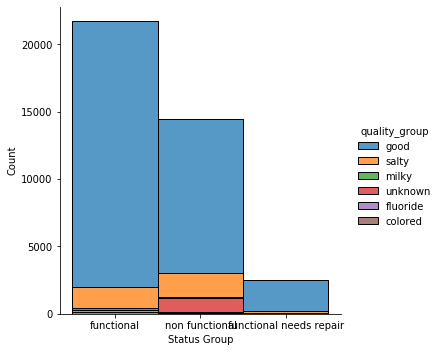

In [43]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'quality_group', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

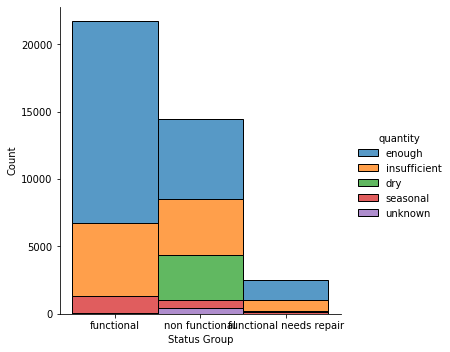

In [44]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'quantity', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

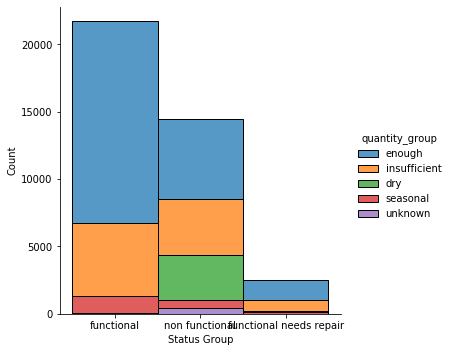

In [45]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'quantity_group', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

In [46]:
Data1.quantity_group.value_counts()

enough          22334
insufficient    10463
dry              3455
seasonal         1924
unknown           515
Name: quantity_group, dtype: int64

In [47]:
Data1.quantity.value_counts()

enough          22334
insufficient    10463
dry              3455
seasonal         1924
unknown           515
Name: quantity, dtype: int64

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

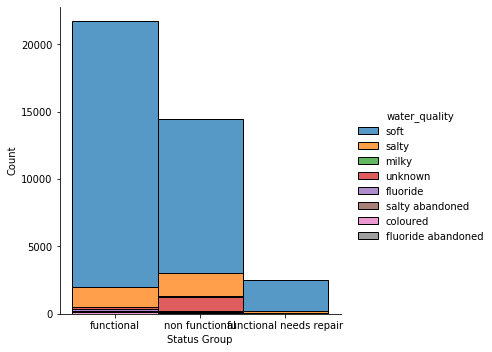

In [48]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'water_quality', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

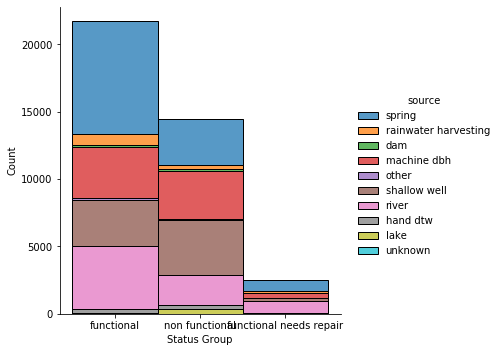

In [49]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'source', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

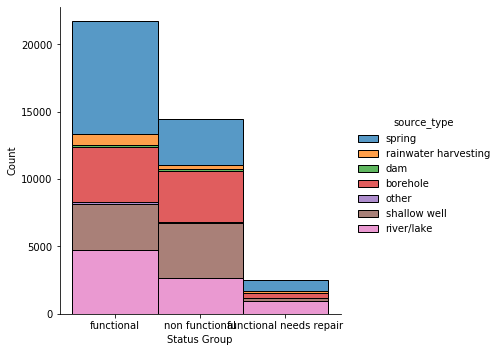

In [50]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'source_type', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

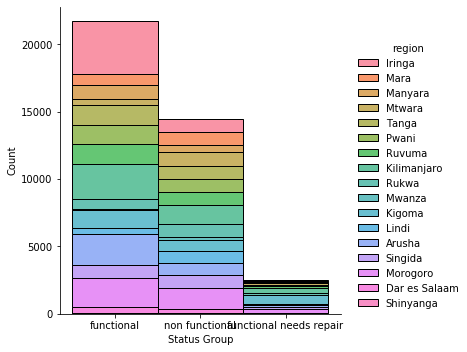

In [51]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'region', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

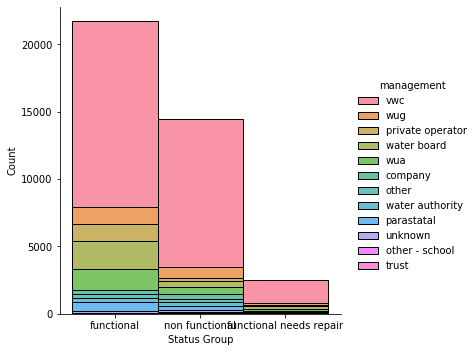

In [52]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'management', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

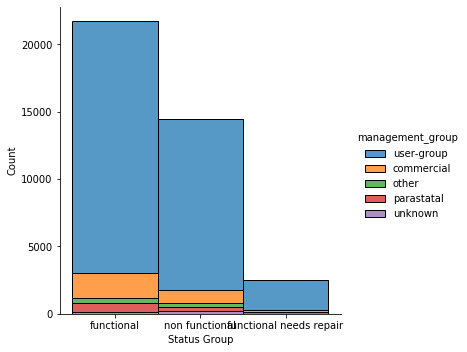

In [53]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'management_group', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

In [54]:
Data['population'].value_counts()

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

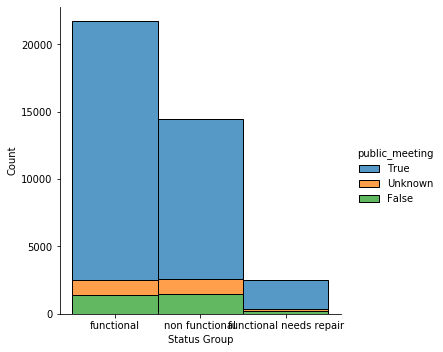

In [55]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'public_meeting', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

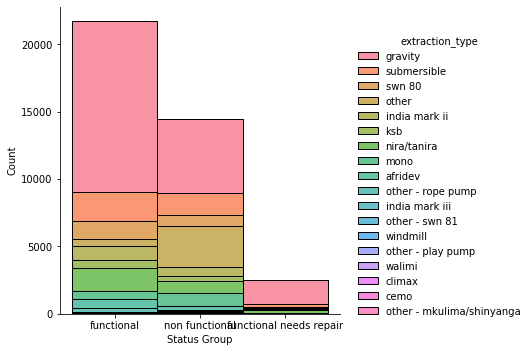

In [56]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'extraction_type', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

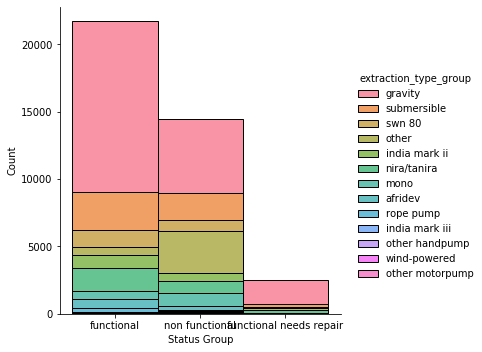

In [57]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'extraction_type_group', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

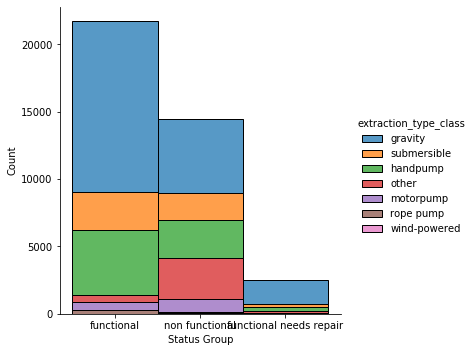

In [58]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'extraction_type_class', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

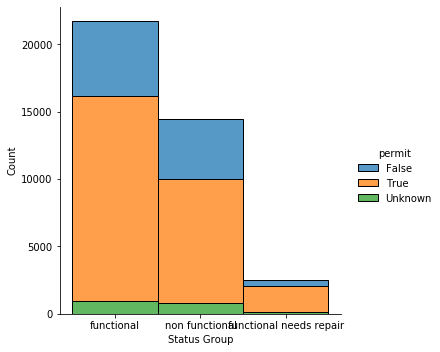

In [59]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'permit', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

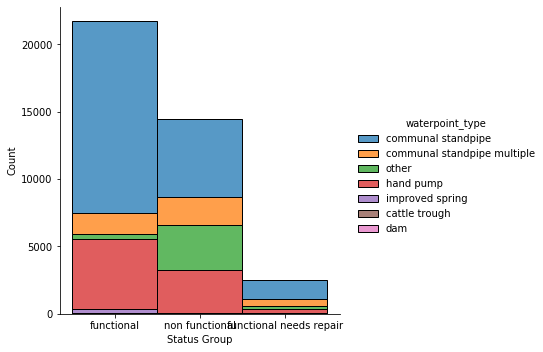

In [60]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'waterpoint_type', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

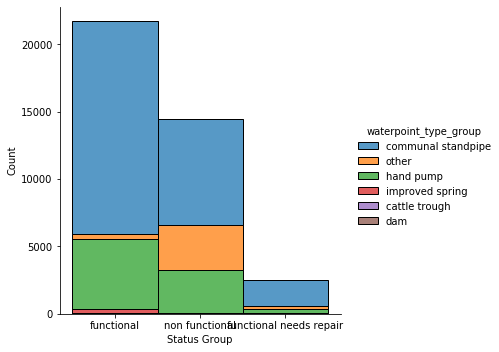

In [61]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'waterpoint_type_group', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

In [62]:
Data['source'].value_counts()

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64

In [63]:
Data['source_type'].value_counts()

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64

In [101]:
Data['source_class'].value_counts()

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64

In [64]:
Data['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

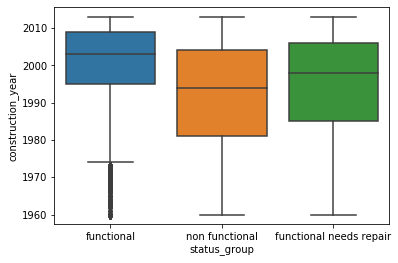

In [65]:
sns.boxplot(data=Data1, y ='construction_year',x='status_group')

In [66]:
BBox = ((Data1.longitude.min(),   Data1.longitude.max(),      
         Data1.latitude.min(), Data1.latitude.max()))
BBox

(29.6071219, 40.34519307, -11.64944018, -1.04237489)

In [67]:
Data['longitude'].value_counts()

0.000000     1812
37.540901       2
33.010510       2
39.093484       2
32.972719       2
             ... 
37.579803       1
33.196490       1
34.017119       1
33.788326       1
30.163579       1
Name: longitude, Length: 57516, dtype: int64

In [68]:
Data1['longitude'].value_counts()

39.103752    2
37.328905    2
37.540901    2
39.086287    2
37.314250    2
            ..
37.687624    1
38.913765    1
35.217654    1
37.261093    1
35.005922    1
Name: longitude, Length: 38645, dtype: int64

In [69]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38691 entries, 69572 to 26348
Data columns (total 39 columns):
amount_tsh               38691 non-null float64
date_recorded            38691 non-null object
funder                   38691 non-null object
gps_height               38691 non-null int64
installer                38691 non-null object
longitude                38691 non-null float64
latitude                 38691 non-null float64
wpt_name                 38691 non-null object
num_private              38691 non-null int64
basin                    38691 non-null object
subvillage               38691 non-null object
region                   38691 non-null object
region_code              38691 non-null int64
district_code            38691 non-null int64
lga                      38691 non-null object
ward                     38691 non-null object
population               38691 non-null int64
public_meeting           38691 non-null object
recorded_by              38691 non-null obj

In [70]:
Data1.status_group.value_counts()

functional                 21704
non functional             14459
functional needs repair     2528
Name: status_group, dtype: int64

In [71]:
Data.status_group.value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

In [72]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59400 entries, 69572 to 26348
Data columns (total 39 columns):
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   59400 non-null object
gps_height               59400 non-null int64
installer                59400 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59400 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           59400 non-null object
recorded_by              59400 non-null obj

In [73]:
map1 = plt.imread('map.png')

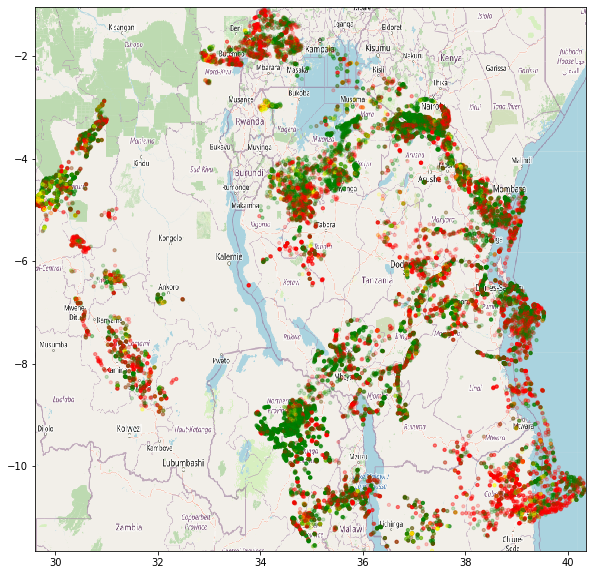

In [74]:
colors = {'functional':'green', 'non functional':'red', 'functional needs repair':'yellow'}


fig, ax = plt.subplots(figsize = (10,10))
ax.scatter(Data1.longitude, Data1.latitude, zorder=1, alpha= 0.2, c=Data1.status_group.map((colors)), s=10)
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(map1, zorder=0, extent = BBox, aspect= 'equal')

In [77]:
Data1.drop(['waterpoint_type_group'], axis = 1, inplace=True)

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [78]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38691 entries, 69572 to 26348
Data columns (total 38 columns):
amount_tsh               38691 non-null float64
date_recorded            38691 non-null object
funder                   38691 non-null object
gps_height               38691 non-null int64
installer                38691 non-null object
longitude                38691 non-null float64
latitude                 38691 non-null float64
wpt_name                 38691 non-null object
num_private              38691 non-null int64
basin                    38691 non-null object
subvillage               38691 non-null object
region                   38691 non-null object
region_code              38691 non-null int64
district_code            38691 non-null int64
lga                      38691 non-null object
ward                     38691 non-null object
population               38691 non-null int64
public_meeting           38691 non-null object
recorded_by              38691 non-null obj

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

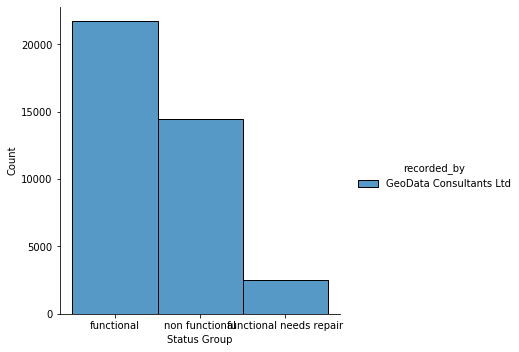

In [79]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'recorded_by', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

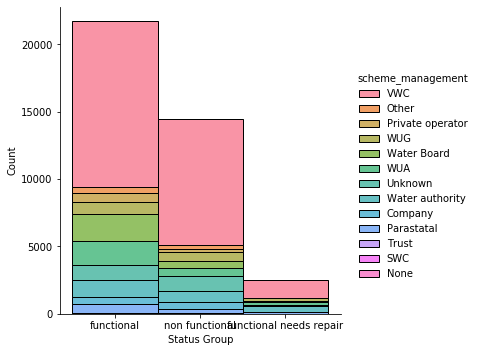

In [80]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'scheme_management', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

In [92]:
Data1.region.value_counts()

Iringa           4922
Kilimanjaro      4344
Morogoro         3988
Arusha           3299
Kigoma           2806
Ruvuma           2624
Pwani            2459
Tanga            2453
Singida          2085
Mara             1952
Rukwa            1806
Mtwara           1643
Manyara          1570
Lindi            1433
Dar es Salaam     788
Mwanza            355
Shinyanga         164
Name: region, dtype: int64

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

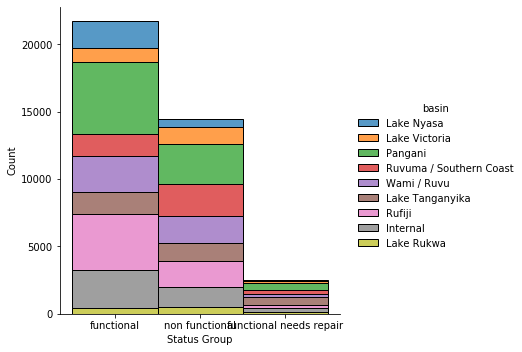

In [89]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'basin', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

Text(0.5, 6.79999999999999, 'Status Group')

<Figure size 720x3600 with 0 Axes>

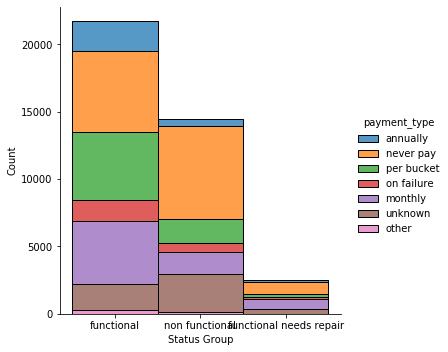

In [97]:
plt.figure(figsize=(10,50))
sns.displot(Data1, x="status_group", hue = 'payment_type', multiple = 'stack')
plt.xlabel('Status Group', size = 10)

In [98]:
Data1.payment.value_counts()

never pay                13832
pay monthly               7116
pay per bucket            7027
unknown                   5086
pay annually              2885
pay when scheme fails     2361
other                      384
Name: payment, dtype: int64

In [99]:
Data1.payment_type.value_counts()

never pay     13832
monthly        7116
per bucket     7027
unknown        5086
annually       2885
on failure     2361
other           384
Name: payment_type, dtype: int64

In [102]:
Data1.drop(['recorded_by', 'date_recorded', 'wpt_name', 'payment', 'source_type', 'lga', 'subvillage', 'ward'], axis = 1, inplace=True)

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
maybe drop, 'lga', 'subvillage', 'ward'

In [103]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38691 entries, 69572 to 26348
Data columns (total 30 columns):
amount_tsh               38691 non-null float64
funder                   38691 non-null object
gps_height               38691 non-null int64
installer                38691 non-null object
longitude                38691 non-null float64
latitude                 38691 non-null float64
num_private              38691 non-null int64
basin                    38691 non-null object
region                   38691 non-null object
region_code              38691 non-null int64
district_code            38691 non-null int64
population               38691 non-null int64
public_meeting           38691 non-null object
scheme_management        38691 non-null object
permit                   38691 non-null object
construction_year        38691 non-null int64
extraction_type          38691 non-null object
extraction_type_group    38691 non-null object
extraction_type_class    38691 non-null obje

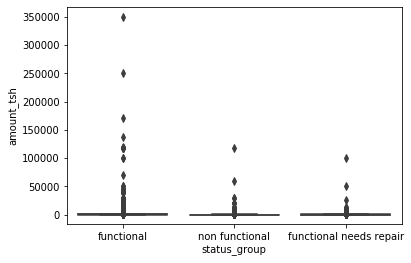

In [104]:
sns.boxplot(data=Data1, y ='amount_tsh',x='status_group')

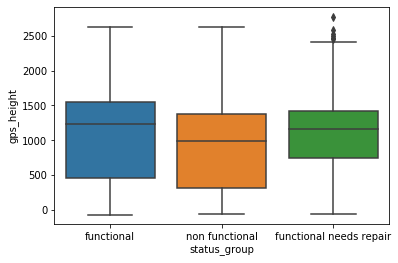

In [105]:
sns.boxplot(data=Data1, y ='gps_height',x='status_group')

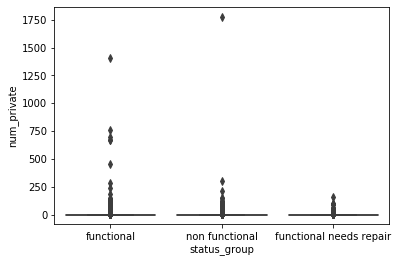

In [106]:
sns.boxplot(data=Data1, y ='num_private',x='status_group')

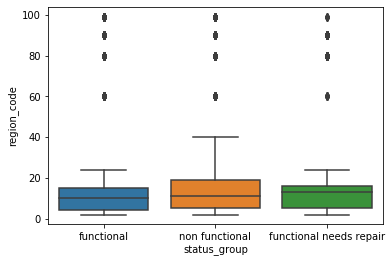

In [107]:
sns.boxplot(data=Data1, y ='region_code',x='status_group')

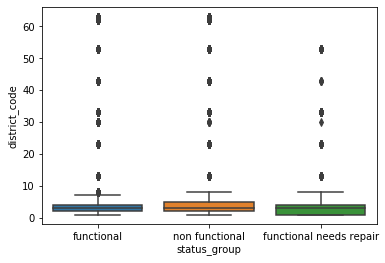

In [108]:
sns.boxplot(data=Data1, y ='district_code',x='status_group')

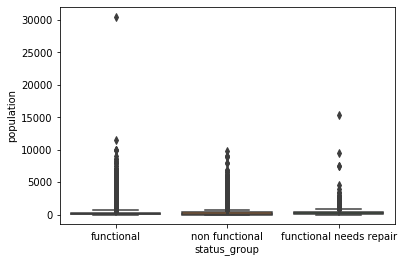

In [109]:
sns.boxplot(data=Data1, y ='population',x='status_group')

In [110]:
Data1.drop(['district_code'], axis = 1, inplace=True)

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [111]:
Data1.num_private.value_counts()

0      37955
6         81
1         70
8         46
5         43
       ...  
87         1
42         1
62         1
141        1
94         1
Name: num_private, Length: 63, dtype: int64

In [112]:
Data1.amount_tsh.value_counts()

0.0         21337
500.0        3092
50.0         2432
20.0         1438
1000.0       1399
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 95, dtype: int64

In [113]:
Data1.drop(['num_private'], axis = 1, inplace=True)

In [114]:
Data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38691 entries, 69572 to 26348
Data columns (total 28 columns):
amount_tsh               38691 non-null float64
funder                   38691 non-null object
gps_height               38691 non-null int64
installer                38691 non-null object
longitude                38691 non-null float64
latitude                 38691 non-null float64
basin                    38691 non-null object
region                   38691 non-null object
region_code              38691 non-null int64
population               38691 non-null int64
public_meeting           38691 non-null object
scheme_management        38691 non-null object
permit                   38691 non-null object
construction_year        38691 non-null int64
extraction_type          38691 non-null object
extraction_type_group    38691 non-null object
extraction_type_class    38691 non-null object
management               38691 non-null object
management_group         38691 non-null ob

In [128]:
status = {'functional':1, 'non functional':2, 'functional needs repair':3}
Data1.status_group.replace(status, inplace=True)
Data1.head()

C:\Users\mered\anaconda3\envs\learn-env\lib\site-packages\pandas\core\generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,amount_tsh,funder,gps_height,installer,longitude,latitude,basin,region,region_code,population,...,management_group,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_class,waterpoint_type,status_group
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,Roman,1390,Roman,34.938093,-9.856322,Lake Nyasa,Iringa,11,109,...,user-group,annually,soft,good,enough,enough,spring,groundwater,communal standpipe,1
8776,0.0,Grumeti,1399,GRUMETI,34.698766,-2.147466,Lake Victoria,Mara,20,280,...,user-group,never pay,soft,good,insufficient,insufficient,rainwater harvesting,surface,communal standpipe,1
34310,25.0,Lottery Club,686,World vision,37.460664,-3.821329,Pangani,Manyara,21,250,...,user-group,per bucket,soft,good,enough,enough,dam,surface,communal standpipe multiple,1
67743,0.0,Unicef,263,UNICEF,38.486161,-11.155298,Ruvuma / Southern Coast,Mtwara,90,58,...,user-group,never pay,soft,good,dry,dry,machine dbh,groundwater,communal standpipe multiple,2
9944,20.0,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Pangani,Tanga,4,1,...,user-group,per bucket,salty,salty,enough,enough,other,unknown,communal standpipe multiple,1


In [130]:
Data1.status_group.value_counts()

1    21704
2    14459
3     2528
Name: status_group, dtype: int64

In [131]:
df = pd.get_dummies(Data1)
df.head()

,amount_tsh,gps_height,longitude,latitude,region_code,population,construction_year,status_group,funder_0,funder_A/co Germany,...,source_class_groundwater,source_class_surface,source_class_unknown,waterpoint_type_cattle trough,waterpoint_type_communal standpipe,waterpoint_type_communal standpipe multiple,waterpoint_type_dam,waterpoint_type_hand pump,waterpoint_type_improved spring,waterpoint_type_other
id,,,,,,,,,,,,,,,,,,,,,
69572,6000.0,1390,34.938093,-9.856322,11,109,1999,1,0,0,...,1,0,0,0,1,0,0,0,0,0
8776,0.0,1399,34.698766,-2.147466,20,280,2010,1,0,0,...,0,1,0,0,1,0,0,0,0,0
34310,25.0,686,37.460664,-3.821329,21,250,2009,1,0,0,...,0,1,0,0,0,1,0,0,0,0
67743,0.0,263,38.486161,-11.155298,90,58,1986,2,0,0,...,1,0,0,0,0,1,0,0,0,0
9944,20.0,0,39.172796,-4.765587,4,1,2009,1,0,0,...,0,0,1,0,0,1,0,0,0,0
